In [1]:
# import the modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [4]:
#Load the dataset

# Load the train data
train = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Project_Move_To_Melbourne/train.csv")
train.head(10)

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070
5,5949,4,1,985000,4,106,7.8,3079,3,2,181,154.0,2016,0,145.03883,0,5549
6,732,2,1,801000,1,106,5.2,3056,2,1,156,87.0,2007,23,144.94980,2,11918
7,6459,2,2,465000,3,196,12.0,3073,1,1,676,61.0,2012,-1,145.02142,2,21650
8,263,4,0,950000,1,150,10.5,3034,3,3,761,281.0,1970,21,144.87140,6,4502
9,5325,3,0,1512000,1,106,5.3,3070,1,0,326,125.0,1905,6,144.99902,2,11364


In [5]:
# Shape of the data
print("Shape of the train data is:", train.shape)

Shape of the train data is: (4781, 17)


In [6]:
# Statistical properties of the data.
print("Statistical properties of train data is as follows:")
print(train.describe())

Statistical properties of train data is as follows:
                Id        Rooms         Type         Price       Method  \
count  4781.000000  4781.000000  4781.000000  4.781000e+03  4781.000000   
mean   3432.481908     2.964861     0.540473  1.080936e+06     1.441330   
std    1953.488159     0.957911     0.837337  6.757098e+05     1.141898   
min       0.000000     1.000000     0.000000  1.450000e+05     0.000000   
25%    1757.000000     2.000000     0.000000  6.300000e+05     1.000000   
50%    3434.000000     3.000000     0.000000  9.000000e+05     1.000000   
75%    5126.000000     4.000000     1.000000  1.337000e+06     1.000000   
max    6829.000000     8.000000     2.000000  9.000000e+06     4.000000   

           SellerG     Distance     Postcode     Bathroom          Car  \
count  4781.000000  4781.000000  4781.000000  4781.000000  4781.000000   
mean    131.485254    10.045367  3103.308931     1.587952     1.605522   
std      77.203630     5.871496    87.538064     0

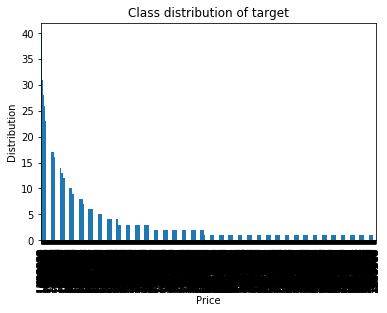

In [7]:
## Drop the Id.
train.drop("Id",axis=1,inplace=True)

# Checking for the distribution of the target
train['Price'].value_counts().plot(kind='bar')
plt.title("Class distribution of target")
plt.xlabel("Price")
plt.ylabel("Distribution")

print()

In [9]:
# Checking for skewness in the features
print("Skewness for different features is as shown below: ")
print(train.skew())

Skewness for different features is as shown below: 
Rooms             0.208722
Type              1.029247
Price             2.429553
Method            1.071776
SellerG           0.129703
Distance          1.674962
Postcode          3.921342
Bathroom          1.328302
Car               1.532654
Landsize         21.066059
BuildingArea      8.885376
YearBuilt        -2.135044
CouncilArea       0.033060
Longtitude       -0.270886
Regionname       -0.498197
Propertycount     1.039731
dtype: float64


In [10]:
#EDA & Data Preprocessing
# check correlation

corr = train.corr()

# print correlation
print(corr)

                  Rooms      Type     Price    Method   SellerG  Distance  \
Rooms          1.000000 -0.590817  0.523579 -0.053525 -0.029506  0.289699   
Type          -0.590817  1.000000 -0.426876  0.088308  0.026955 -0.242188   
Price          0.523579 -0.426876  1.000000 -0.048165 -0.065393 -0.158197   
Method        -0.053525  0.088308 -0.048165  1.000000 -0.008889 -0.064479   
SellerG       -0.029506  0.026955 -0.065393 -0.008889  1.000000  0.024476   
Distance       0.289699 -0.242188 -0.158197 -0.064479  0.024476  1.000000   
Postcode       0.050753  0.018737  0.120166 -0.034679 -0.001913  0.414110   
Bathroom       0.607276 -0.276890  0.493173 -0.013801 -0.034939  0.114934   
Car            0.420030 -0.278868  0.237160 -0.019285 -0.000271  0.257264   
Landsize       0.092030 -0.043433  0.072753 -0.021601 -0.028470  0.063563   
BuildingArea   0.595395 -0.386768  0.519207 -0.048287 -0.042596  0.145823   
YearBuilt     -0.056373  0.304479 -0.297060  0.021274 -0.000680  0.252163   

In [14]:
#Model building

#Indepenent varibles
X = train.drop('Price', axis=1)

# store dependent variable
y = train['Price']

# spliting the dataframe
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.3,random_state=8)

#Instantiate linear regression model
regressor = LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred = regressor.predict(X_val)
print(y_pred)


[1593599.04230925 1451114.92449012  680518.00493613 ... 1524151.49561459
 1329688.67835453  861311.36999363]


In [15]:
# Calculate r2_score
r2 = r2_score(y_val,y_pred)

#print r2
print(r2)

0.6709784755252334


In [16]:
# Predict the price of the house using a lasso regressor. Check if there is any improvement in the prediction.

# instantiate lasso model
lasso = Lasso()

# fit and predict
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_val)

print(lasso_pred)

[1593562.4411152  1451115.36747584  680529.6090802  ... 1524152.61880606
 1329699.67722631  861308.06182039]


In [17]:
# Calculate r2_score of lasso model

r2_lasso = r2_score(y_val,lasso_pred)
print(r2_lasso)

0.670978141417018


In [18]:
# Let's check the house price prediction using a ridge regressor.

# instantiate ridge model
ridge = Ridge()

# fit and predict
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_val)

print(ridge_pred)

[1580151.84541091 1451622.35484838  685700.86908826 ... 1526082.20261925
 1333322.7696501   860076.26871982]


In [19]:
# Calculate r2_score of ridge model

r2_ridge = r2_score(y_val,ridge_pred)
print(r2_ridge)

0.670765209066022


In [20]:
# Next predict the house price using cross-validated estimators which are the part of the Model selection: choosing estimators and their parameters.

# Initiate Linear Regression Model
regressor = LinearRegression()

# Initiate cross validation score
score = cross_val_score(regressor,X_train,y_train,scoring='r2',cv=10)
print(score)


[0.57769766 0.69786557 0.68962943 0.21091495 0.54907255 0.63559724
 0.45884698 0.65518455 0.61303293 0.58507978]


In [21]:
#calculate mean of the score

mean_score = np.mean(score)
print(mean_score)

0.5672921638321313


In [25]:
#As you can see that there is very less improvement(~1%), even after applying the regularization and cross-validation score, perform the prediction using a polynomial regressor to generate second-degree polynomial features.

# make pipeline for second degree polynomialfeatures
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Fit the model on training set
model.fit(X_train,y_train)

# predict the model performance
y_pred_poly = model.predict(X_val)
print(y_pred)

[2035645.48259735 1806795.54406738  752167.32437134 ... 1341513.3885498
 1173608.2957077   838000.89306641]


In [26]:
# calculate r2 score of above model

r2_poly = r2_score(y_val, y_pred_poly)
print(r2_poly)

0.7272585951036861


In [27]:
#Prediction on the test data and creating the sample submission file.

# Prediction on test data

# Read the test data
test = pd.read_csv("G:/Data Science ML AI/Python files/Projects/Project_Move_To_Melbourne/test.csv")

# Storing the id from the test file
id_ = test['Id']

# Applying the same transformation on test data
test.drop('Id',axis=1,inplace=True)

# Predict on the test data using the best model
y_pred_test = model.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Price':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission1.csv',index=False)